# **Import Needed Libraries**

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
#read the data
df = pd.read_csv('/content/Super_Store_Data_After_EDA.csv')
df.head()

,Unnamed: 0,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Year,Order Month,Shipping Days
0,0,2,0,0,137,15,42420,2,0,0,261.9600,2,0.00,41.9136,2016,11,3
1,1,2,0,0,137,15,42420,2,0,1,731.9400,3,0.00,219.5820,2016,11,3
2,2,3,0,0,108,8,33311,2,0,3,957.5775,5,0.45,-383.0310,2015,10,7
3,3,3,0,0,184,3,90032,3,0,2,48.8600,7,0.00,14.1694,2014,6,5
4,4,3,0,0,184,3,90032,3,0,3,1706.1840,9,0.20,85.3092,2014,6,5


# **Working on Logistic regression model without feauter selection**

**Spliting the Data**

In [17]:
median_sales = df['Sales'].median()
df['Hights_Sales'] = (df['Sales'] > median_sales).astype(int)

In [19]:
#get the median and make a condation for target col insted of being a continous data(ogistic works on probability values)
x = df.drop(['Sales','Hights_Sales'], axis=1)
y = df['Hights_Sales']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Trian the data on the logistic regression model**

In [20]:
#Standarized the numerical col
scaler = StandardScaler()
x_trained_scaled = scaler.fit_transform(X_train)
x_tested_scaled = scaler.transform(X_test)

In [31]:
model = LogisticRegression()
normal_fitting = model.fit(x_trained_scaled,y_train)

**Get the prediction and Performance meuserment**

In [32]:
y_predict = model.predict(x_tested_scaled)

In [33]:
# Perfromance meuserment using the classification matrices
# 1.accuracy score
accuracy = accuracy_score(y_test,y_predict)

# 2.classification report
class_report = classification_report(y_test,y_predict)

# 3.confusion matrix
conf_matrix = confusion_matrix(y_test,y_predict)

In [34]:
print(f'Accuracy Score is \n',accuracy)

Accuracy Score is 
 0.6745283018867925


In [35]:
print(f'Classification Report is \n',class_report)

Classification Report is 
               precision    recall  f1-score   support

           0       0.66      0.76      0.71       219
           1       0.70      0.58      0.63       205

    accuracy                           0.67       424
   macro avg       0.68      0.67      0.67       424
weighted avg       0.68      0.67      0.67       424



In [36]:
print(f'Confusion Matrix is \n',conf_matrix)

Confusion Matrix is 
 [[167  52]
 [ 86 119]]


**Some visualizes for the performance meuserment**

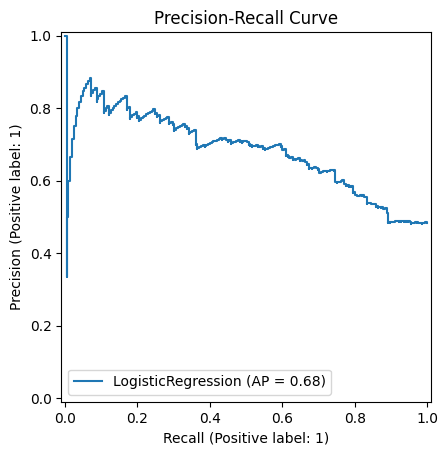

In [37]:
#Get the Precision Recall Curve
PrecisionRecallDisplay.from_estimator(model, x_tested_scaled, y_test)
plt.title('Precision-Recall Curve')
plt.show()

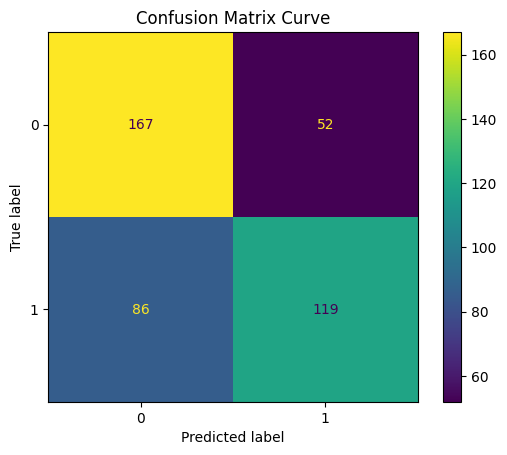

In [42]:
#Get Confusion Matri ploting
conf_curve = ConfusionMatrixDisplay(conf_matrix)
conf_curve.plot()
plt.title("Confusion Matrix Curve")
plt.show()

# **Start to make Some Feuter selection techniques to compare**

**Recursive Feature Elimination Selection**

In [45]:
RFE_LogModel = LogisticRegression()
rfe_selector = RFE(RFE_LogModel, n_features_to_select=5)
rfe_selector.fit(x, y)
selected_rfe_features = x.columns[rfe_selector.support_]
selected_rfe_features

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Index(['Segment', 'Region', 'Sub-Category', 'Quantity', 'Discount'], dtype='object')

Main Five Features according to the RFE are(['Segment', 'Region', 'Sub-Category', 'Quantity', 'Discount'])


**Forward Feature Selection**

In [46]:
fsf_selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_new_fsf = fsf_selector.fit_transform(x, y)
selected_fsf_features = x.columns[fsf_selector.get_support()]
selected_fsf_features

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [3 8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Index(['Segment', 'Sub-Category', 'Quantity', 'Discount', 'Profit'], dtype='object')

Main Five Features according to the Fowrward are(['Segment','Sub-Category', 'Quantity', 'Discount', 'Profit'])

# **Start To see some Assumtions to exaplin the result of the model**

**Linearty Assumption**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


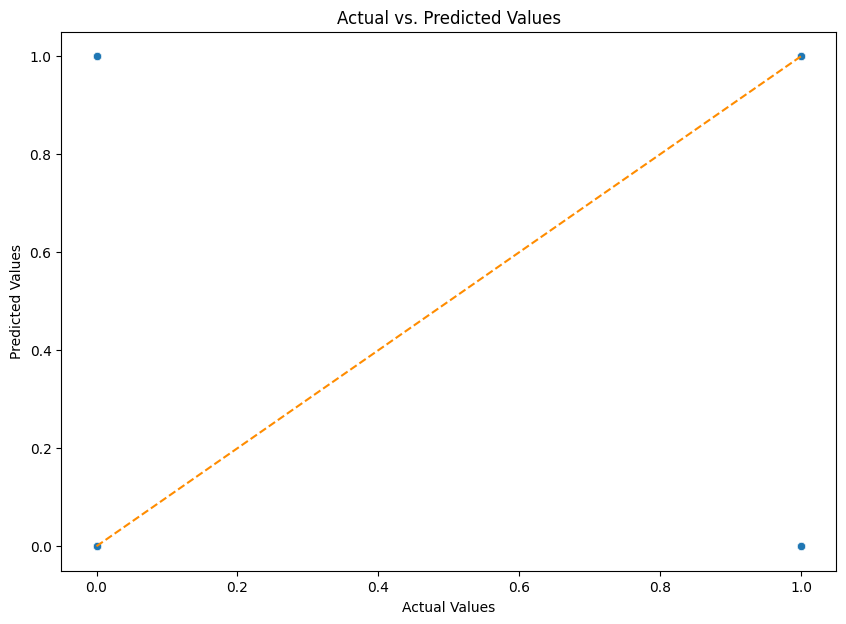

In [53]:
features = x
label = y
model =LogisticRegression().fit(features,label)
# Generate predictions
predictions = model.predict(features)

# Create results dataframe
df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
df_results['Residuals'] = df_results['Actual'] - df_results['Predicted']

# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Actual', y='Predicted', data=df_results)

# Perfect prediction line
min_val = min(df_results['Actual'].min(), df_results['Predicted'].min())
max_val = max(df_results['Actual'].max(), df_results['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='darkorange', linestyle='--')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Thier is a problem in the linearty assamption